<a href="https://colab.research.google.com/github/ghostfm3/ksks/blob/master/%E3%82%B3%E3%83%B3%E3%83%94%E3%83%A5%E3%83%BC%E3%82%BF%E3%83%93%E3%82%B8%E3%83%A7%E3%83%B3%E7%89%B9%E8%AB%96deepl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


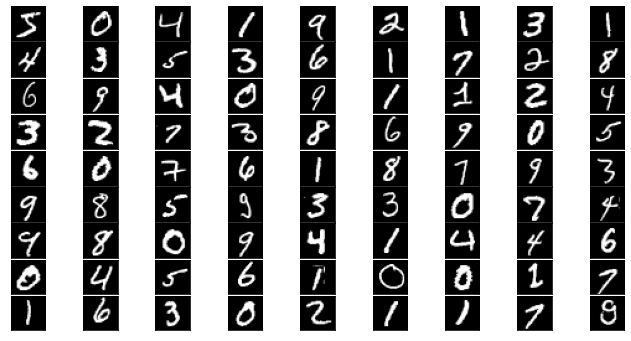

In [3]:
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5,
hspace=0.05, wspace=0.05)
for i in range(81):
 ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
 ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [4]:
# 2次元データを数値に変換
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# 型変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 255で割ったものを新たに変数とする
x_train /= 255
x_test /= 255

In [5]:
# one-hot encodingを施すためのメソッド
from keras.utils.np_utils import to_categorical
# クラス数は10
num_classes = 10
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
# one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [8]:
batch_size = 128
epochs = 20
model.compile(loss='categorical_crossentropy',
  optimizer=Adam(),
  metrics=['accuracy'])

history = model.fit(x_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 22s 17ms/step - loss: 0.4533 - accuracy: 0.8635 - val_loss: 0.1046 - val_accuracy: 0.9692
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1025 - accuracy: 0.9679 - val_loss: 0.0776 - val_accuracy: 0.9769
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0718 - accuracy: 0.9771 - val_loss: 0.0721 - val_accuracy: 0.9783
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0537 - accuracy: 0.9832 - val_loss: 0.0636 - val_accuracy: 0.9801
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0630 - val_accuracy: 0.9792
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0646 - val_accuracy: 0.9811
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0593 - val_accuracy: 0.983

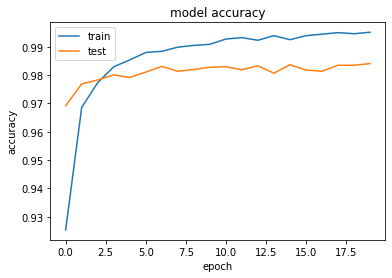

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

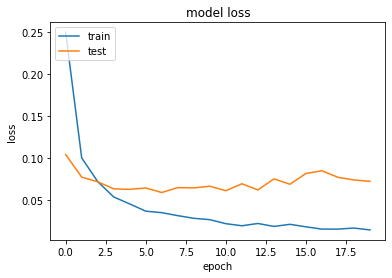

In [10]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()